In [1]:
from vikor_v_analysis import VikorVAnalysis
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import numpy as np

Let's start by computing all data for the experiment, then we'll have all descriptions.

In [2]:
experiment = VikorVAnalysis('wind_farms_data.csv')
experiment.run_experiment_v()
experiment.run_experiment_weights()
experiment.run_experiment_ahp()
experiment.run_experiment_criteria_elimination(
        experiment.data.drop(columns=['S16', 'S17', 'F28', 'F29', 'F30']),
        experiment.impacts.drop(index=['S16', 'S17', 'F28', 'F29', 'F30']),
        ahp_weights=np.array([
            0.041/6, 0.041/6, 0.041/6, 0.041/6, 0.041/6, 0.041/6,
            0.176/3, 0.176/3, 0.176/3,
            0.465/6, 0.465/6, 0.465/6, 0.465/6, 0.465/6, 0.465/6, # updated from 8
            0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10, 0.318/10,
            # financial costs removed completely
        ])
    )
experiment.run_experiment_financial_efficiency(['F28', 'F29', 'F30'])

# Towards Robust Sustainable Solutions Using VIKOR

## Results

### Dataset and Baseline

In the empirical study, a set of 7 potential offshore wind farm locations were investigated.

> TUTAJ OPIS TYCH LOKALIZACJI na podstawie EXCELA.

The locations were evaluated based on 30 criteria, which can be clustered into five groups: Location (L1-L6), Market (M7-M9), Social Benefits (S10-S17), Economic Benefits (E18-E27) and Financial Costs (F28-F30). The detailed description of the criteria is presented in **TUTAJ**. 

The criterial performance of each location is presented in the table below. The values are presented in their original units and are not normalized.

In [3]:
experiment.data

,L1,L2,L3,L4,L5,L6,M7,M8,M9,S10,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
A1,720,122,37.0,60.0,32.0,41,4,5.901639,2882390.40,1.455826e+06,...,16.560,89.124786,1782.495720,150.441696,0,3,0,8912.478600,300.883392,159.840
A2,720,119,22.0,65.0,32.0,39,3,6.050420,2882390.40,1.455826e+06,...,16.560,89.124786,1782.495720,150.441696,0,3,0,8912.478600,300.883392,159.840
A3,1498,190,40.0,-40.0,35.0,50,4,7.884211,5996973.36,3.028927e+06,...,34.454,185.429069,3708.581373,313.002306,0,2,2,18542.906870,626.004613,332.556
A4,1045,130,25.0,-25.0,45.0,60,3,8.038462,4183469.40,2.112970e+06,...,24.035,129.354724,2587.094483,218.349406,0,2,2,12935.472410,436.698812,231.990
A5,350,41,50.0,-50.0,42.0,42,3,8.536585,1401162.00,7.076933e+05,...,8.050,43.324549,866.490975,73.131380,0,1,0,4332.454875,146.262760,77.700
A6,1140,131,22.5,35.0,39.0,45,3,8.702290,4563784.80,2.305058e+06,...,26.220,141.114245,2822.284890,238.199352,1,2,2,14111.424450,476.398704,253.080
A7,400,91,23.0,28.5,46.5,60,4,4.395604,1601328.00,8.087924e+05,...,9.200,49.513770,990.275400,83.578720,0,1,0,4951.377000,167.157440,88.800


The cost/benefit impact of each criterion is presented here:

In [4]:
pd.DataFrame(experiment.impacts).T

,L1,L2,L3,L4,L5,L6,M7,M8,M9,S10,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
Type (profit/cost),1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


Before proceeding with any robustness experiments, a baseline ranking of the locations should be established. In order to produce a ranking using the VIKOR method, each criterion needs to be assigned the preference weight. The weights can be obtained using expert judgment, however, in order to ascertain objectivity of the research, in this study CRITIC objective weighting method was used. Additionally, for benchmarking purposes, equal weights were also compared. The weights are presented **TUTAJ** and are charted **TUTAJ**.

In [5]:
pd.DataFrame(experiment.v_weights_scenarios, index=experiment.data.columns)

,eq,crit
L1,0.033333,0.017860
L2,0.033333,0.016923
L3,0.033333,0.058060
L4,0.033333,0.063396
L5,0.033333,0.068597
L6,0.033333,0.054253
M7,0.033333,0.068469
M8,0.033333,0.036517
M9,0.033333,0.017860
S10,0.033333,0.017860


<Figure size 640x480 with 0 Axes>

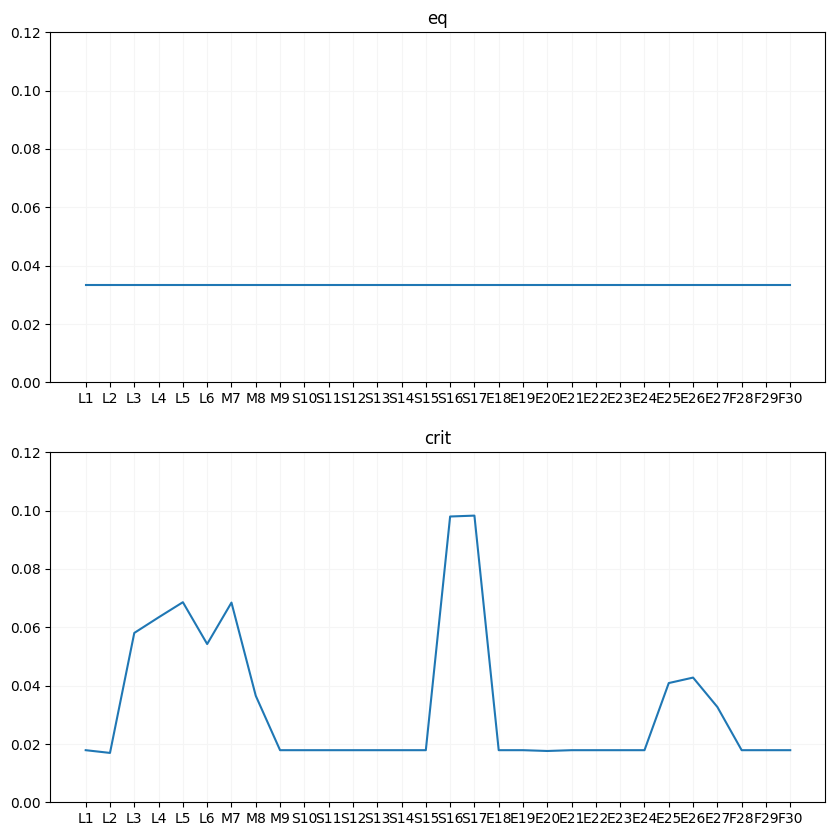

In [6]:
experiment.draw_v_weights_plots(None, ylim=[0,0.12])
plt.show()

The `v` parameter in VIKOR method allows to choose between multiple approaches to obtain the final ranking. If the value is 1, then the strategy of maximum group utility is used, therefore the solution closest to ideal solution is ranked best. However, if value is 0, then the veto strategy is used. This means that the solution with worst value of the worst criterion is penalized in the ranking. Any value between 0 and 1, allows to balance between these two strategies. In case of value 0.5, a consensus between best group utility value and vetoing worst cases is achieved.

In many research papers the value of `v` is set to `0.5` [**dodac referencje**], and this is the value which we will use in this study for benchmarking. 

The `Qi` scores for CRIT and EQ rankings obtained in such manner are presented **TUTAJ**.

In [7]:
comparisons_v = [
    experiment.comparisons_v['eq'].to_dataframe(),
    experiment.comparisons_v['crit'].to_dataframe(),
    # experiment.comparisons_v['ent'].to_dataframe(),
    # experiment.comparisons_v['gini'].to_dataframe(),
]
comparisons_v_df = pd.concat(comparisons_v)
comparisons_v_05 = comparisons_v_df[comparisons_v_df['evaluator'] == 'v_0.5']
comparisons_v_05 = comparisons_v_05.drop(columns=['evaluator', 'decision_problem'])
comparisons_v_05.set_index('weights_set', inplace=True)
comparisons_v_05

,A1,A2,A3,A4,A5,A6,A7
weights_set,,,,,,,
eq,0.273180,0.220163,0.016667,0.179978,0.416958,0.084777,0.516667
crit,0.252917,0.066330,0.628333,0.715227,0.208906,0.590595,1.000000


In [8]:
comparisons_v_05_ranks = pd.DataFrame(rankdata(comparisons_v_05, axis=1, method='min'), index=comparisons_v_05.index, columns=comparisons_v_05.columns)
comparisons_v_05_ranks

,A1,A2,A3,A4,A5,A6,A7
weights_set,,,,,,,
eq,5,4,1,3,6,2,7
crit,3,1,5,6,2,4,7


In [9]:
comparisons_v_05_combined = pd.concat([comparisons_v_05, comparisons_v_05_ranks], keys=['scores', 'ranks'])
comparisons_v_05_combined

A1        A2        A3        A4        A5  \
       weights_set                                                     
scores eq           0.273180  0.220163  0.016667  0.179978  0.416958   
       crit         0.252917  0.066330  0.628333  0.715227  0.208906   
ranks  eq           5.000000  4.000000  1.000000  3.000000  6.000000   
       crit         3.000000  1.000000  5.000000  6.000000  2.000000   

                          A6        A7  
       weights_set                      
scores eq           0.084777  0.516667  
       crit         0.590595  1.000000  
ranks  eq           2.000000  7.000000  
       crit         4.000000  7.000000

For ease of comparison, the `Qi` scores can be visualized in a bar chart **TUTAJ**. Note that the Y axis is inverted, so the higher the bar, the better the ranking.

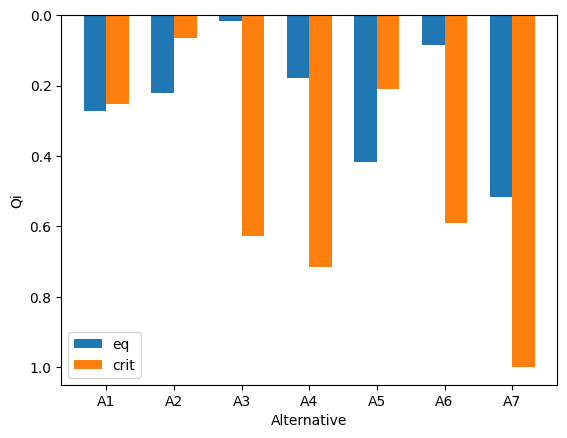

In [10]:
x_num = np.arange(len(comparisons_v_05.columns))
bar_width = 1 / (comparisons_v_05.index.size + 1)

fig, ax = plt.subplots()
i = 0
for index, row in comparisons_v_05.iterrows():
    ax.bar(x_num + (bar_width * i), row, label=index, width=bar_width)
    i += 1

ax.set_xlabel('Alternative')
ax.set_ylabel('Qi')
ax.legend()
ax.set_xticks(x_num + bar_width * (i - 1) / 2)
ax.set_xticklabels(comparisons_v_05.columns)
fig.gca().invert_yaxis()
plt.show()

During the comparative analysis of the obtained baseline rankings, the correlation matrix presented **TUTAJ** might also be helpful.

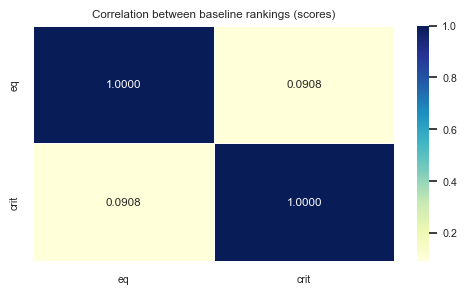

In [11]:
from comparator.utils import plot_correlations_heatmap
plot_correlations_heatmap(comparisons_v_05.T.corr(), figure_size=(5,3), title="Correlation between baseline rankings (scores)", x_label=None, y_label=None)
plt.savefig('var/baseline_correlation_eq_crit_ent_gini_scores.png')


And for ranks:

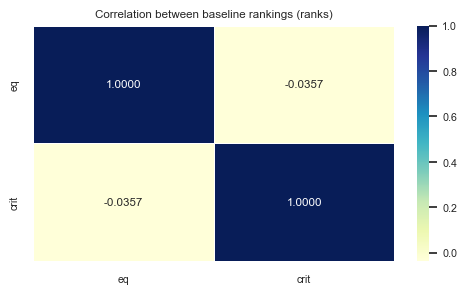

In [12]:
plot_correlations_heatmap(comparisons_v_05_ranks.T.corr(), figure_size=(5,3), title="Correlation between baseline rankings (ranks)", x_label=None, y_label=None)
plt.savefig('var/baseline_correlation_eq_crit_ent_gini_ranks.png')

The analysis of the aforementioned tables and charts allows to observe that both weights sets result in completely different rankings. This is expected, as the CRITIC weights assign more impact to selected criteria, compared to the EQ weights.

### Maximum Group Utility vs Consensus vs Veto Robustness


The rankings presented in section **BASELINES** were produced using a fixed `v=0.5` value. In the first robustness experiment, the value of `v` varied between 0 and 1 in `0.2` steps in order to observe how the rankings change. The results of such sensitivity analysis are presented on the charts **TUTAJ**.  

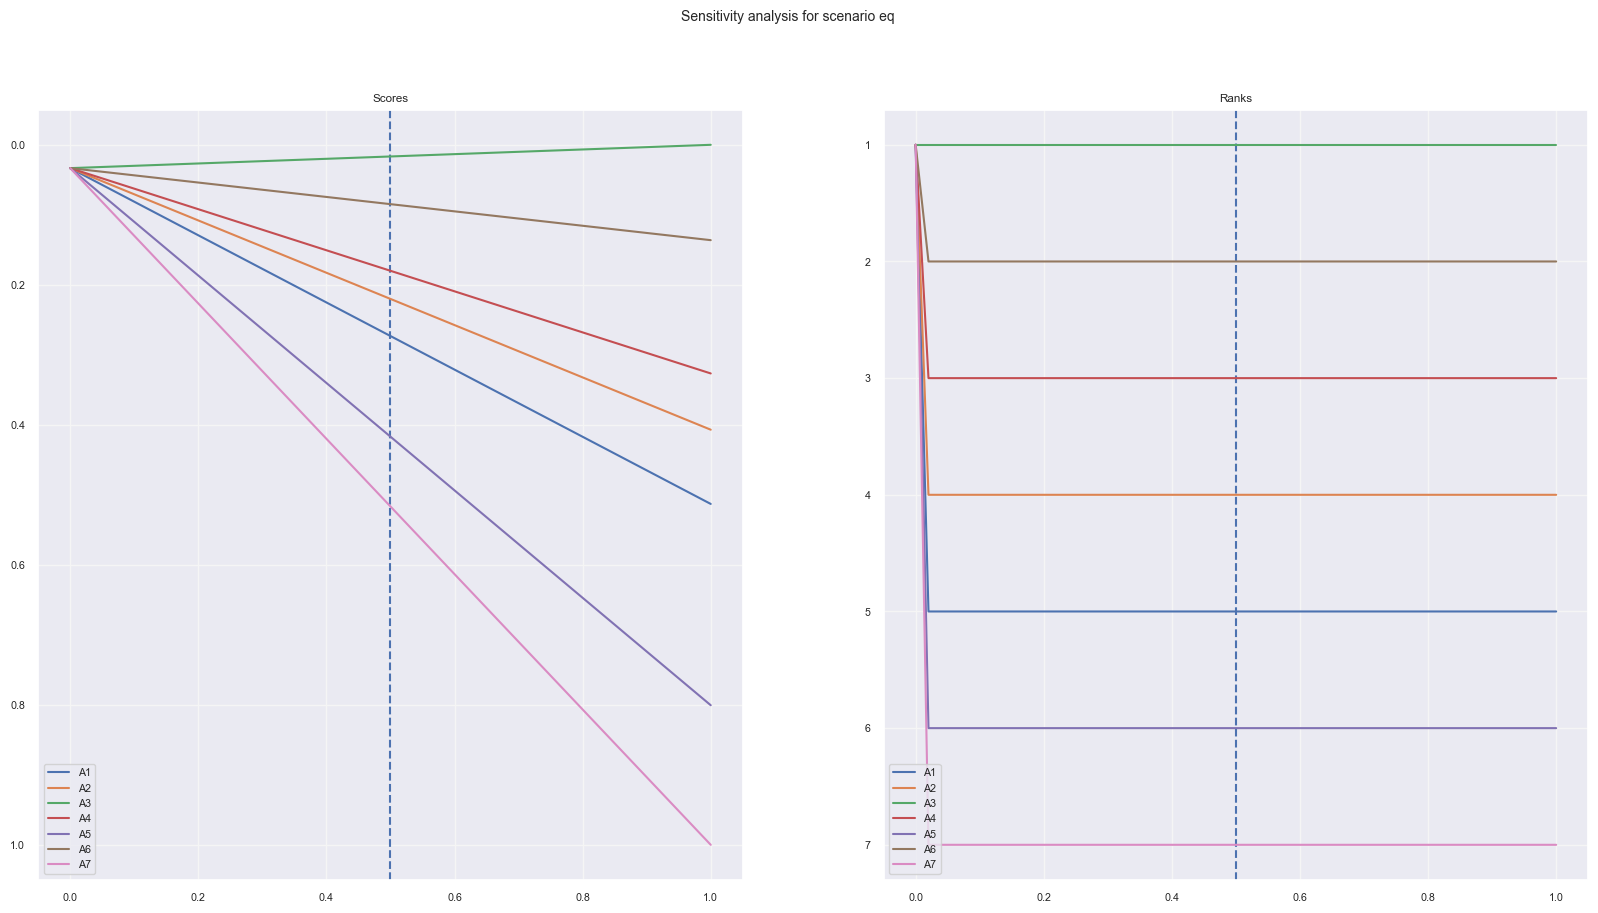

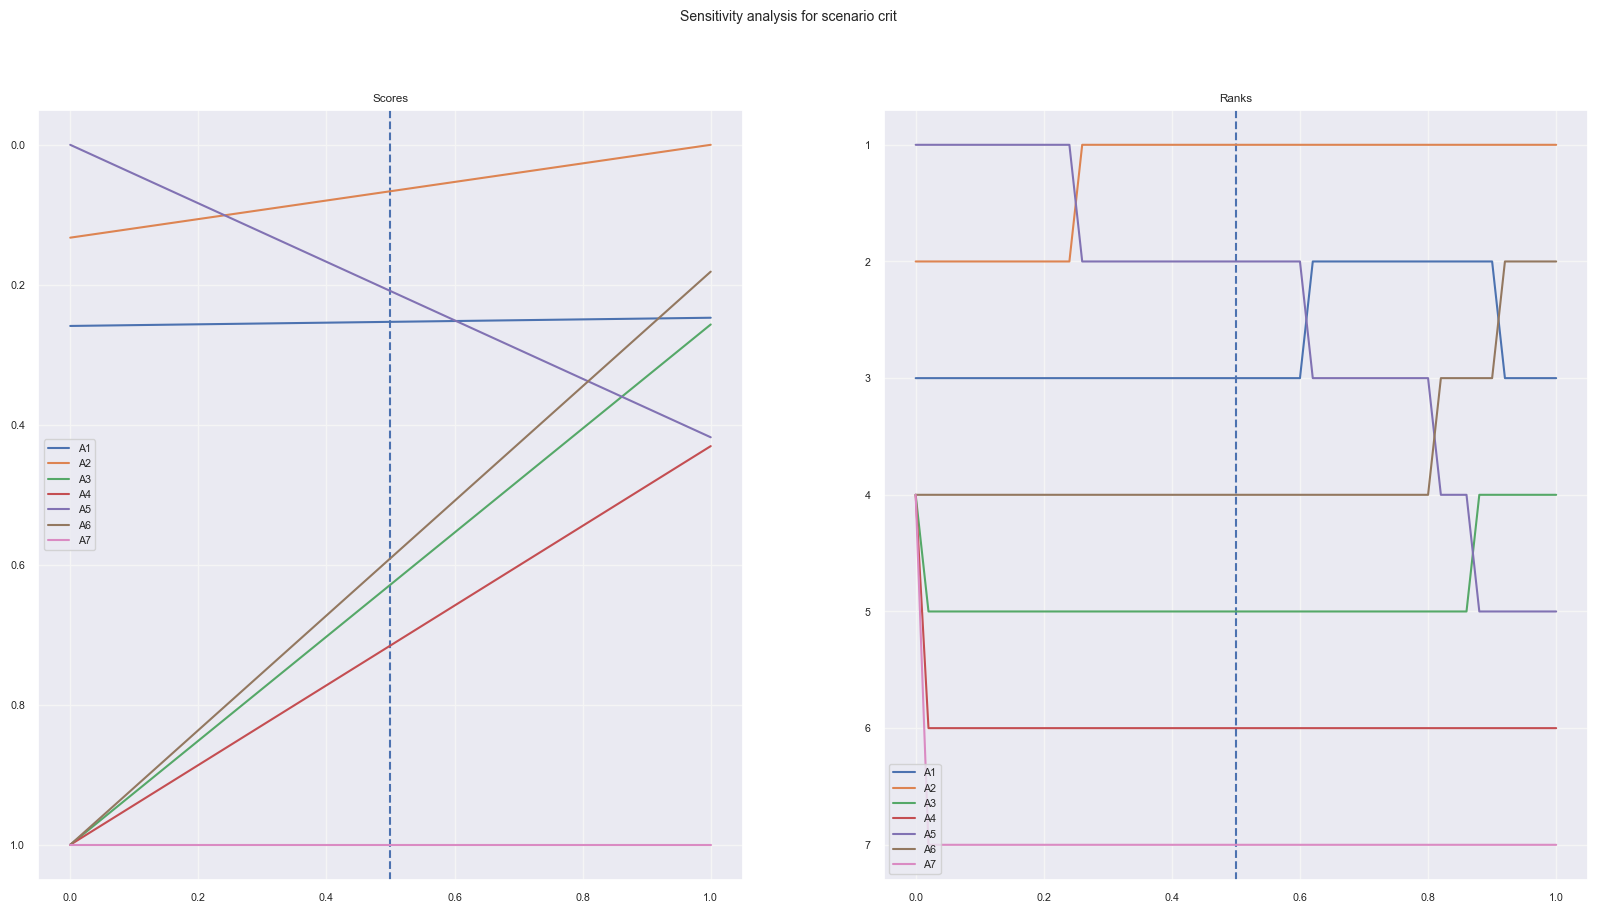

In [13]:
experiment.sensitivity_analysis_v(path_template=None)

For the both studied weights scenarios, two charts are available: sensitivity analysis for `Qi` values and for ranks. The blue dashed line on each chart represents the scores and ranks for the baseline scenario with `v=0.5`. Note, that the Y axis is inverted on the charts, so the best alternative is always plotted highest.

#### EQ scenario

The ranking obtained with the equal-weights scenario is very stable. Regardless of the value of `v`, the alternatives' ranks remain unchanged, unless the value is reduced to `0.0`. Then every alternative has the same score of 0.0333, so the solution is inconclusive. This is caused by **tutaj Jarek podpowie z tych metryk dlaczego; wyłaczamy jedna z R S i wychodzi jak wychodzi**.

In [14]:
tempdf = experiment.comparisons_v['eq'].to_dataframe()
tempdf[tempdf['evaluator'] == 'v_0.0']

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,eq,v_0.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333


#### CRIT scenario

The charts on Fig. **TUTAJ**  show that the alternative A2 is indicated as the best one with a considerable stability interval of `v in approx [0.24, 1]`. Interestingly, its winning position comes from the compromise approach of the VIKOR method. This can be confirmed experimentally by setting `v` to 0, i.e. disabling the "veto" component. In such case, the alternative A5 is ranked best, and alternative A2 is ranked second. As the value of the `v` parameter increases, the alternative A5 ranks lower as second (v=0.24), third (v=0.62), fourth (v=0.82) and fifth (v=0.88). Another interesting observation can be made about alternative A1. It is ranked third, quite stable throughout the scope of the sensitivity analysis with a constant score of around 0.247956 - 0.258778. This stable score regardless of v value, (**co to w ogole znaczy ze score mu sie nie zmienia?**), while the others, such as A5 and A6 change rapidly, leads to an interesting change in ranks. A1 is ranked 3rd for v in range 0-0.6 and then again from 0.92-1.0.

In [15]:
tempdf = experiment.comparisons_v['crit'].to_dataframe()
tempdf

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,crit,v_0.0,0.258778,0.132660,1.000000,1.000000,0.000000,1.000000,1.0
1,wfarms,crit,v_0.02,0.258543,0.130007,0.985133,0.988609,0.008356,0.983624,1.0
2,wfarms,crit,v_0.04,0.258309,0.127353,0.970267,0.977218,0.016712,0.967248,1.0
3,wfarms,crit,v_0.06,0.258074,0.124700,0.955400,0.965827,0.025069,0.950871,1.0
4,wfarms,crit,v_0.08,0.257840,0.122047,0.940533,0.954436,0.033425,0.934495,1.0
5,wfarms,crit,v_0.1,0.257605,0.119394,0.925667,0.943045,0.041781,0.918119,1.0
6,wfarms,crit,v_0.12,0.257371,0.116741,0.910800,0.931654,0.050137,0.901743,1.0
7,wfarms,crit,v_0.14,0.257137,0.114087,0.895933,0.920264,0.058494,0.885367,1.0
8,wfarms,crit,v_0.16,0.256902,0.111434,0.881066,0.908873,0.066850,0.868990,1.0
9,wfarms,crit,v_0.18,0.256668,0.108781,0.866200,0.897482,0.075206,0.852614,1.0


### Weights Robustness (Criterion Importance Analysis ? )


In the second experiment, preference weights robustness was studied. In this experiment, all criteria were assigned equal weights (`1 / 30 = 0.0333`). Then, each criterion's weight was boosted to 10% (whilst the rest of criteria got decreased slightly, to `(1-0.1) / 29 = 0.031034`). In this experiment, a constant value of v=0.5 was used, to provide easy comparison with the baseline ranking in section **ABOVE**. 

A complete matrix of weights for all 31 scenarios is presented **TUTAJ**:

In [16]:
tempdf = pd.DataFrame(experiment.weights_scenarios_weights)
tempdf

,eq,L1,L2,L3,L4,L5,L6,M7,M8,M9,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
0,0.033333,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
1,0.033333,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
2,0.033333,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
3,0.033333,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
4,0.033333,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
5,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
6,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
7,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
8,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.100000,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034
9,0.033333,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,...,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034,0.031034


These weights' scenarios can also be visually compared in the charts on Fig. **TUTAJ**: 

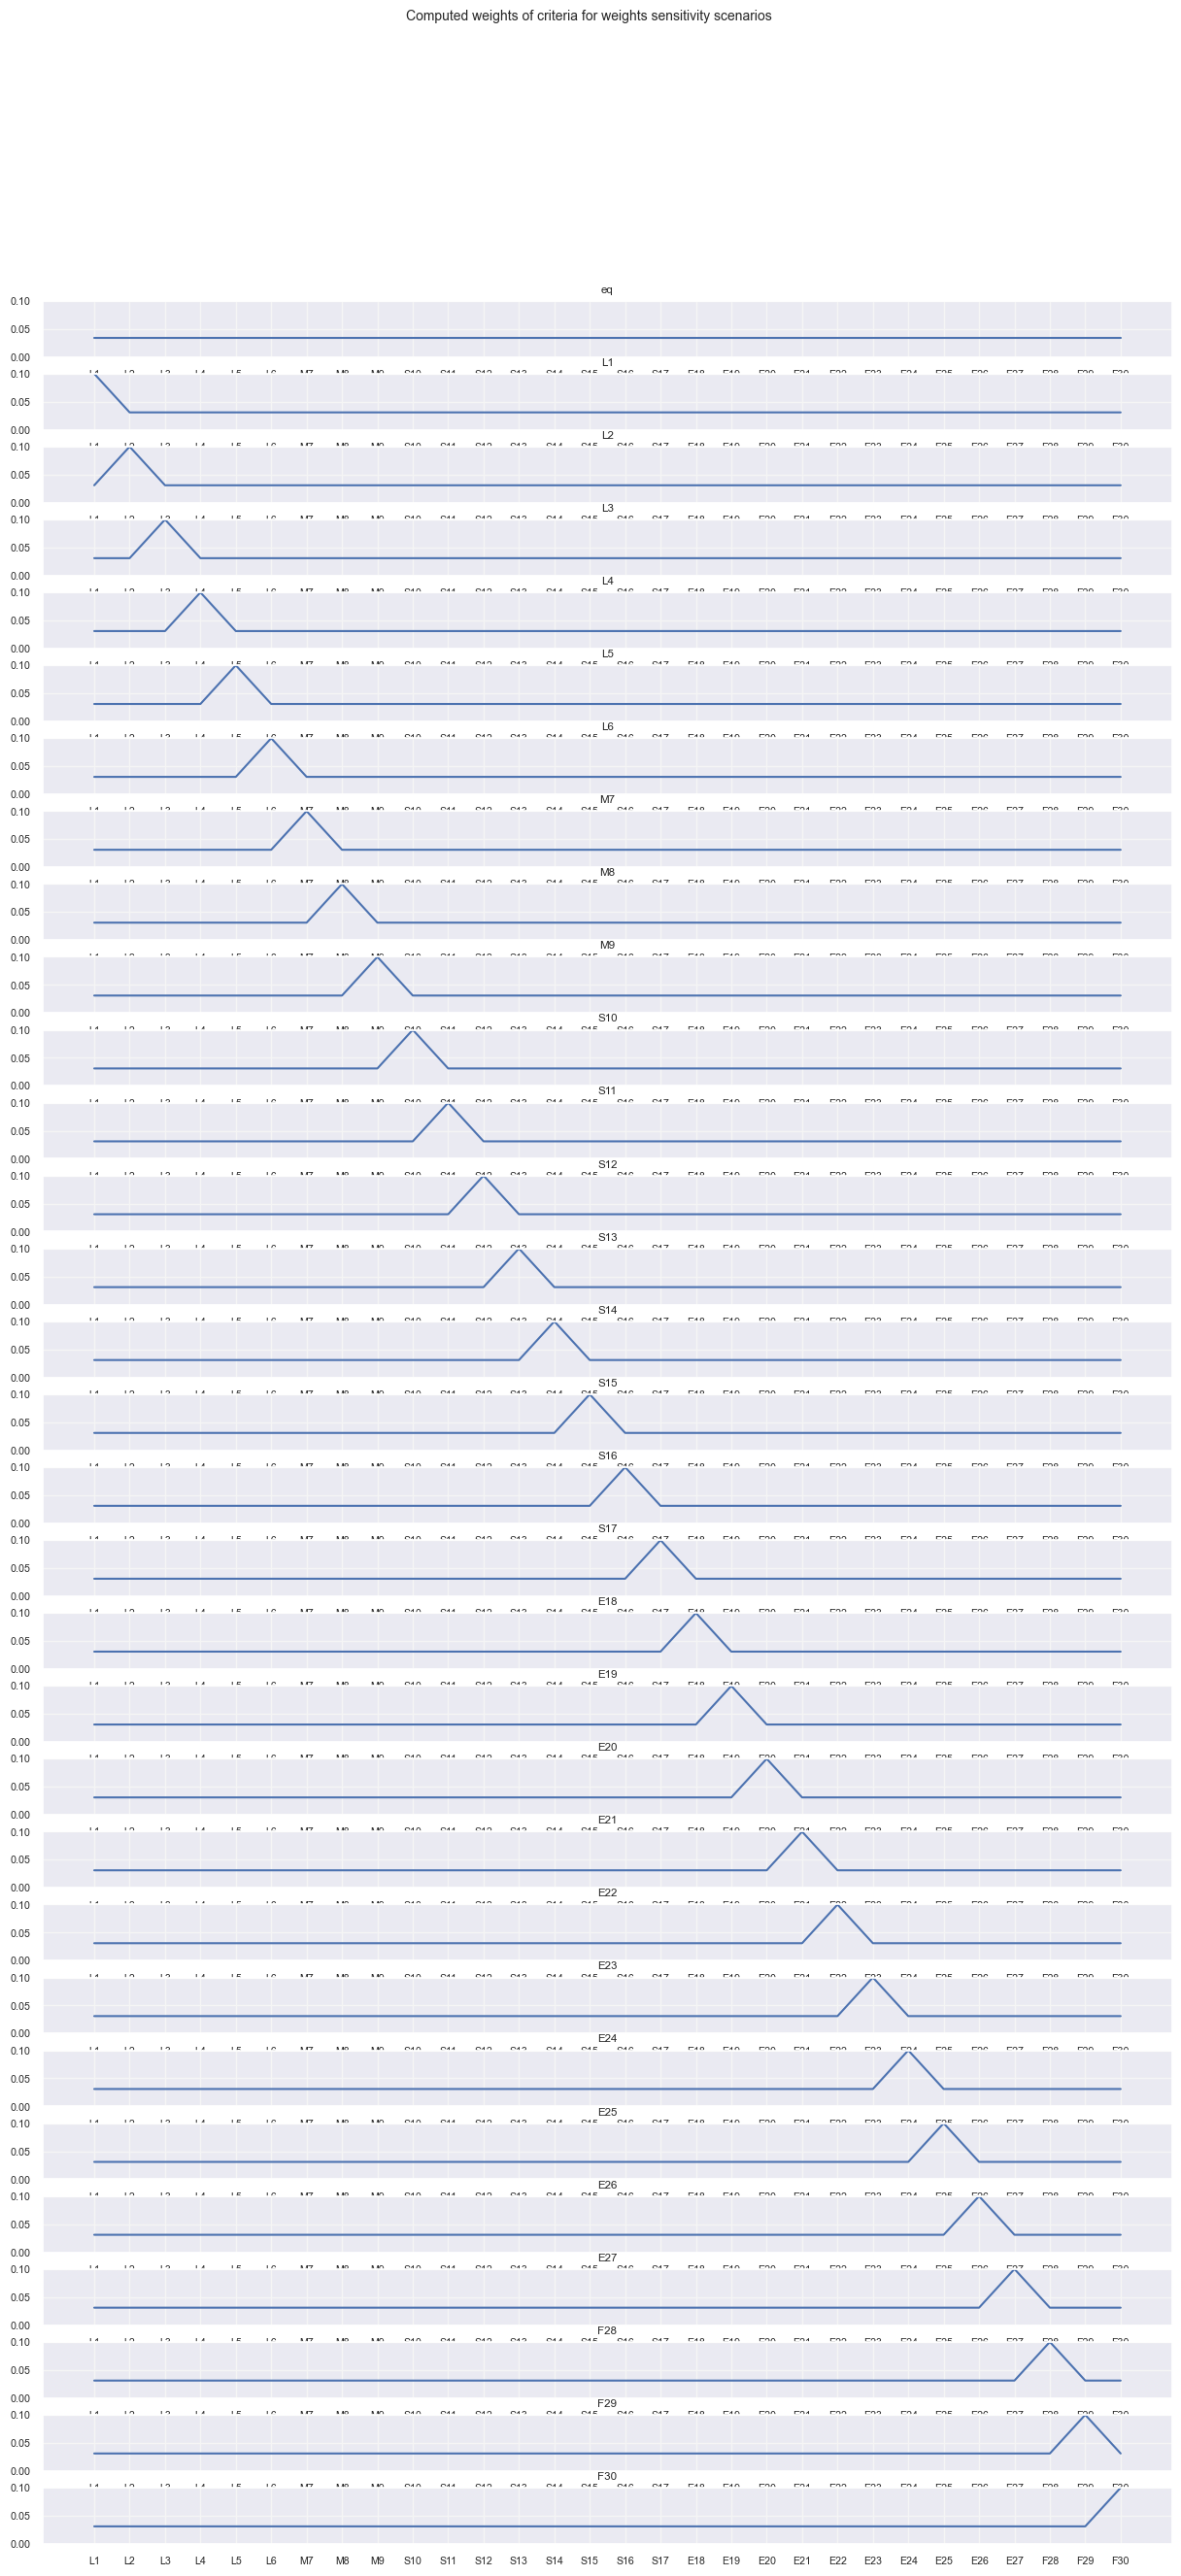

In [17]:
experiment.draw_weights_sensitivity_plots(path=None)
plt.show()

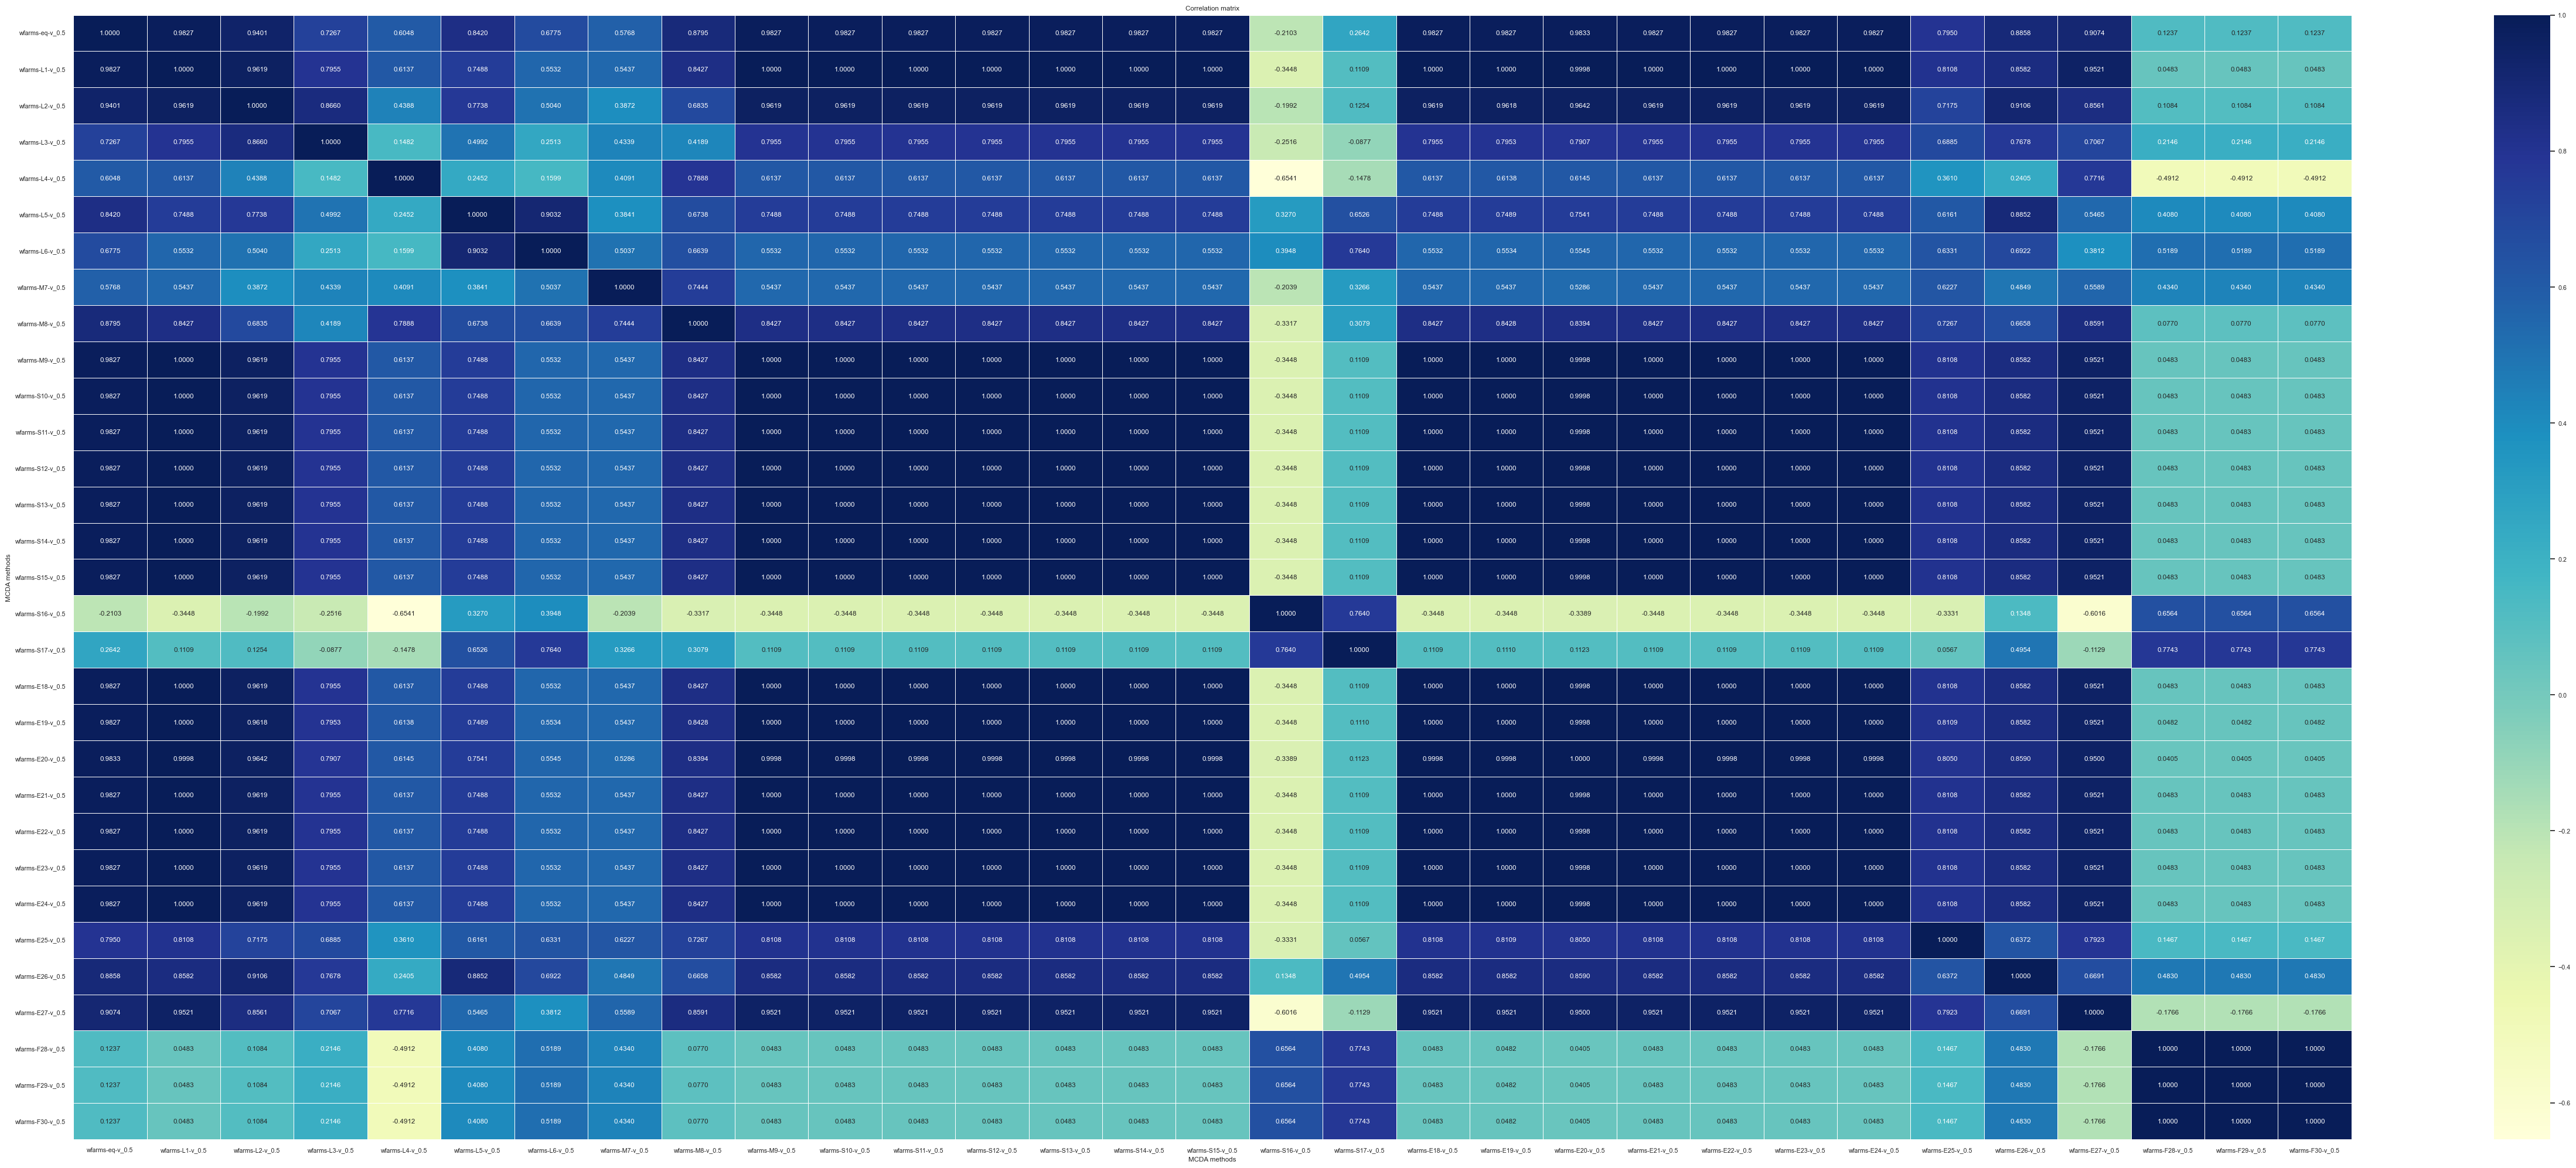

In [18]:
experiment.heatmap_weights_correlations()
plt.show()

The scores of each ranking are presented in Table **TUTAJ**:

In [19]:
experiment.comparison_w.to_dataframe()

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
0,wfarms,eq,v_0.5,0.273180,0.220163,0.016667,0.179978,0.416958,0.084777,0.516667
1,wfarms,L1,v_0.5,0.535014,0.488595,0.000000,0.229744,0.915535,0.081011,0.968423
2,wfarms,L2,v_0.5,0.370198,0.337905,0.000000,0.242815,0.931948,0.150850,0.756711
3,wfarms,L3,v_0.5,0.436597,0.171171,0.241071,0.135752,0.969166,0.023815,0.500000
4,wfarms,L4,v_0.5,0.763493,0.749278,0.000000,0.158934,0.361801,0.417962,0.769891
5,wfarms,L5,v_0.5,0.215712,0.168286,0.000000,0.616936,0.665175,0.204266,1.000000
6,wfarms,L6,v_0.5,0.209817,0.153695,0.154762,0.685565,0.347397,0.047085,1.000000
7,wfarms,M7,v_0.5,0.759496,0.133728,0.506125,0.094036,0.328113,0.000000,1.000000
8,wfarms,M8,v_0.5,0.505953,0.431295,0.000000,0.143388,0.347232,0.048192,1.000000
9,wfarms,M9,v_0.5,0.535014,0.488595,0.000000,0.229744,0.915535,0.081011,0.968423


Also, the results can be visualized on the plots on Fig. **TUTAJ**. The scores for the equal weights are always plotted as blue solid line, whereas the scores for the individual scenarios are scattered as dots. The Y axis is inverted, so the higher the bar, the better the ranking.

<Figure size 640x480 with 0 Axes>

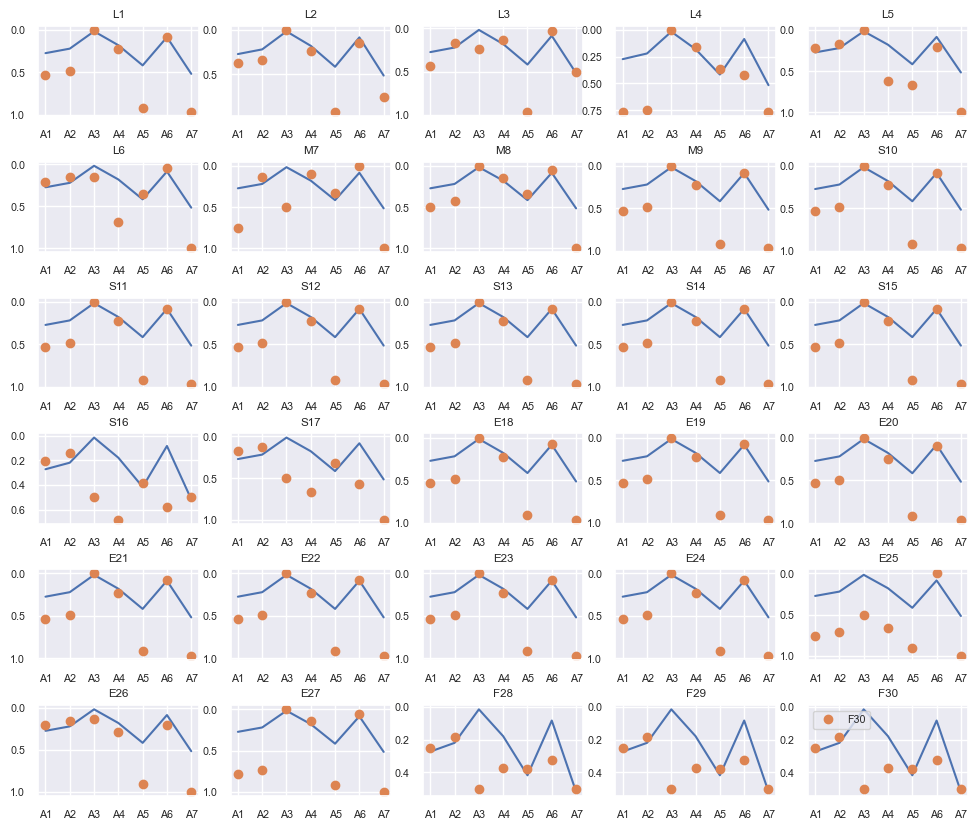

In [20]:
experiment.draw_weights_scores()

Majority of the scenarios produced highly correlated rankings. For example L1 & L2 have a correlation of 0.9619 (respectively correlated 0.9827 and 0.9401 to the equal weights' scenario). This can be visually confirmed on the charts, where for example A1 and A2 are scored slightly better for scenario L2, but still not enough to have better rank than A4. The only actual difference is between A5 and A7, which switch on the last 2 spots in the ranking.

On the other hand, a huge area of low correlation can be observed for scenarios S16-S17 and F28-F30. They seem to be uncorrelated to majority of other scenarios, except themselves. Whilst it could be expected for the F28-F30 scenarios, as these criteria form a complete financial cost cluster, which can be expected to be in conflict to other criteria, in case of S16-S17 criteria, they are only a part of a bigger Social cluster S10-S17. Let's investigate the results. For S16 and S17 scenarios, alternatives A2 and A1 are scored better than for other cases, whereas A4 which usually ranked quite high, for S16 and A17 scenarios is ranked last or second to last. Similar observation regarding alternatives A2 and A1 can be made regarding the F28-F30 scenarios. These facts indicate that alternatives A2 and A1 are highly supported by the Financial and part of the Social criteria, but not by the rest of the criteria. This can be confirmed by the fact that the S16-S17 and F28-F30 scenarios are highly correlated to each other, but not to the rest of the scenarios.

### Cluster Robustness (Expert Judgment Application ? )

The aforementioned fact that Financial cluster and part of the Social cluster of criteria supported different alternatives that the rest of the criteria leads to the third experiment, in which the weights of individual criteria will be set using expert judgment. An expert was given a task to perform pairwise comparison of all 5 clusters of criteria. Using the AHP method, scores of all clusters were computed. The score of each cluster was then equally divided between all criteria within that cluster. The obtained final weights are presented **TUTAJ**:

In [21]:
ahp_weights = pd.DataFrame(experiment.weights_scenarios_ahp['ahp_clusters']).T
ahp_weights.columns = experiment.data.columns
ahp_weights

,L1,L2,L3,L4,L5,L6,M7,M8,M9,S10,...,E21,E22,E23,E24,E25,E26,E27,F28,F29,F30
0,0.0062,0.0062,0.0062,0.0062,0.0062,0.0062,0.053,0.053,0.053,0.0525,...,0.0287,0.0287,0.0287,0.0287,0.0287,0.0287,0.0287,0.0323,0.0323,0.0323


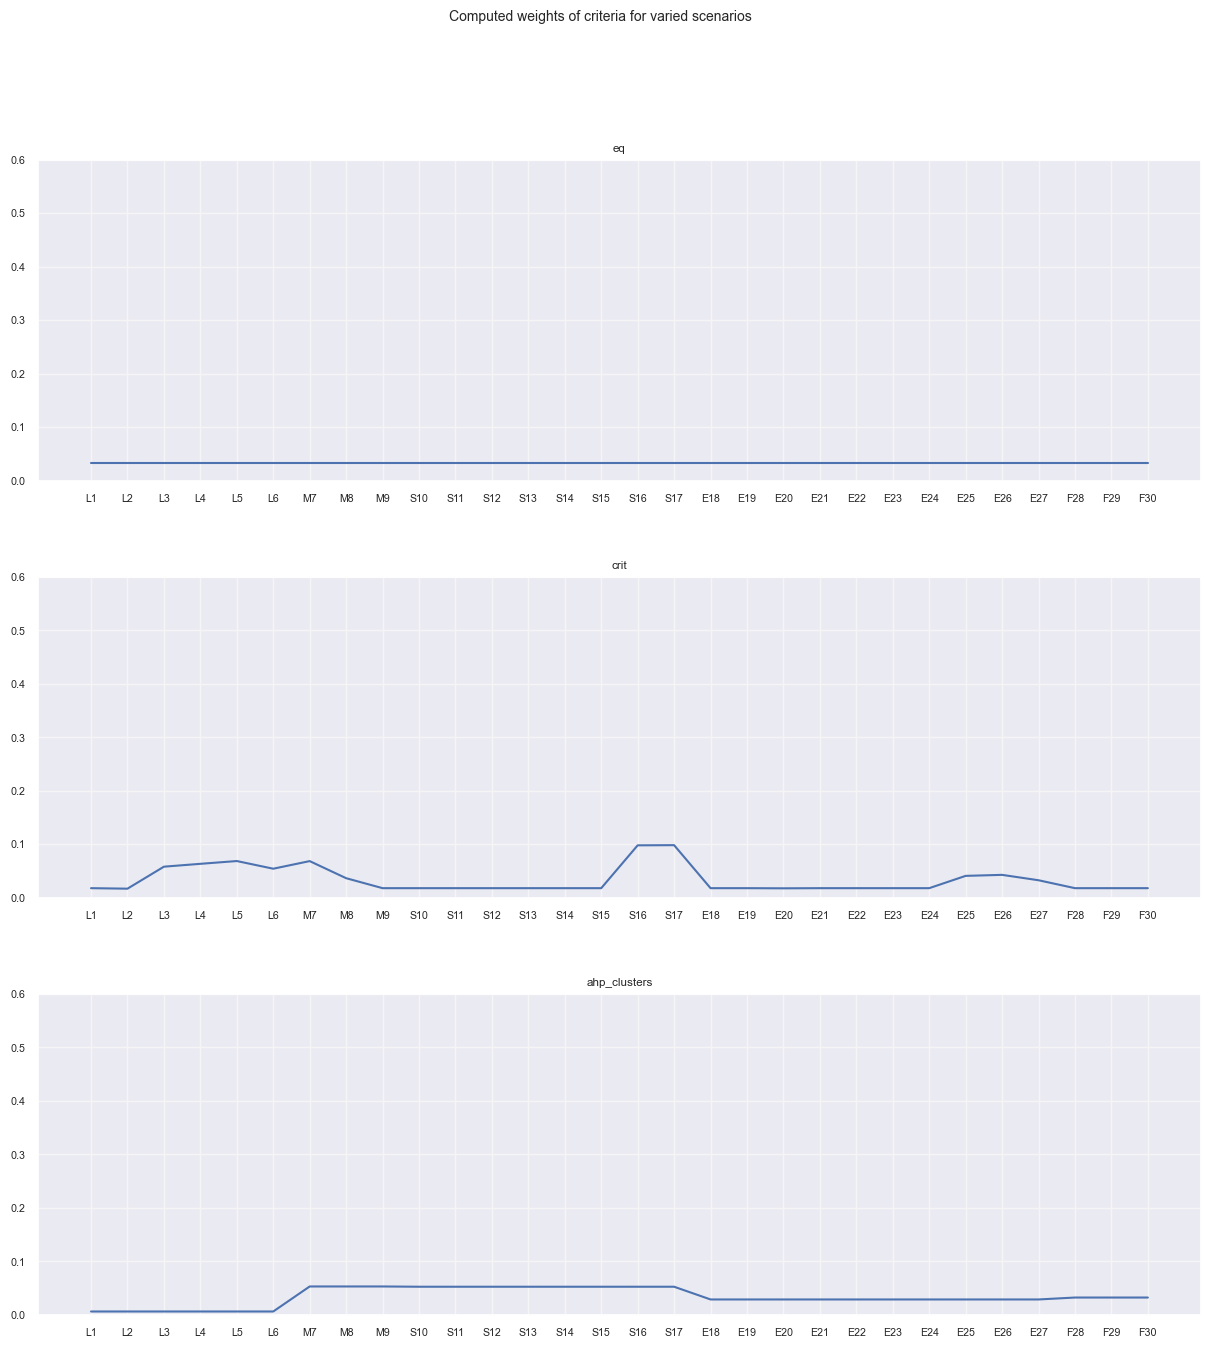

In [22]:
experiment.draw_ahp_weights_plots()

Again, the VIKOR method was used to evaluate each alternative. A value of `v=0.5` was used to ascertain comparability with the benchmark rankings. The results are presented in table **TUTAJ** and on chart on Fig **TUTAJ**:

In [23]:
tempdf = experiment.comparison_ahp.to_dataframe()
tempdf[tempdf['weights_set'] == 'ahp_clusters']

,decision_problem,weights_set,evaluator,A1,A2,A3,A4,A5,A6,A7
2,wfarms,ahp_clusters,v=0.5,0.753345,0.197229,0.5,0.622675,0.86539,0.544407,1.0


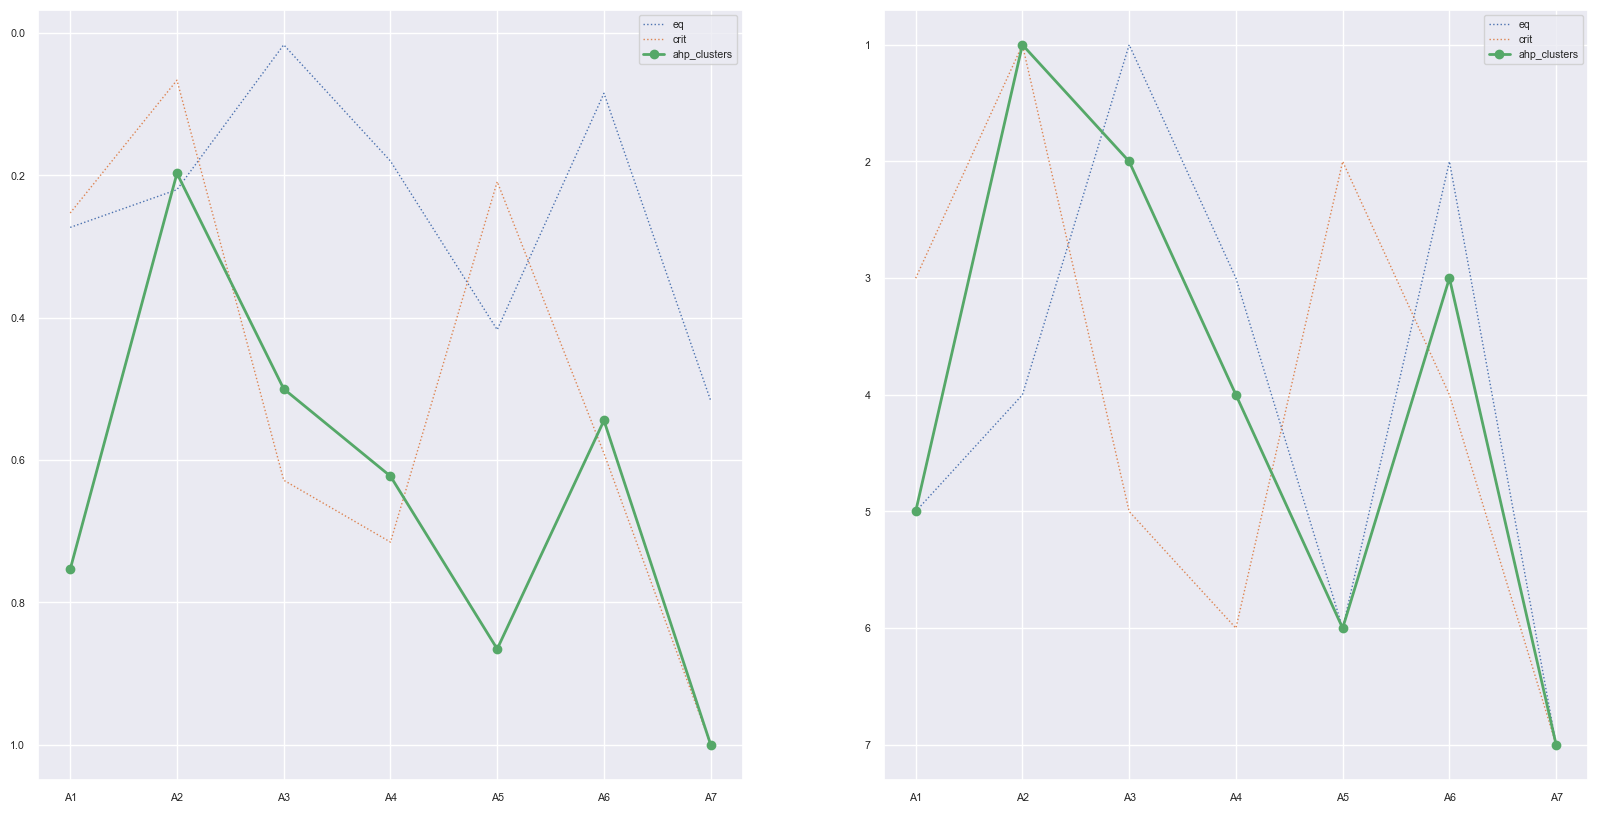

In [24]:
experiment.draw_ahp_results()

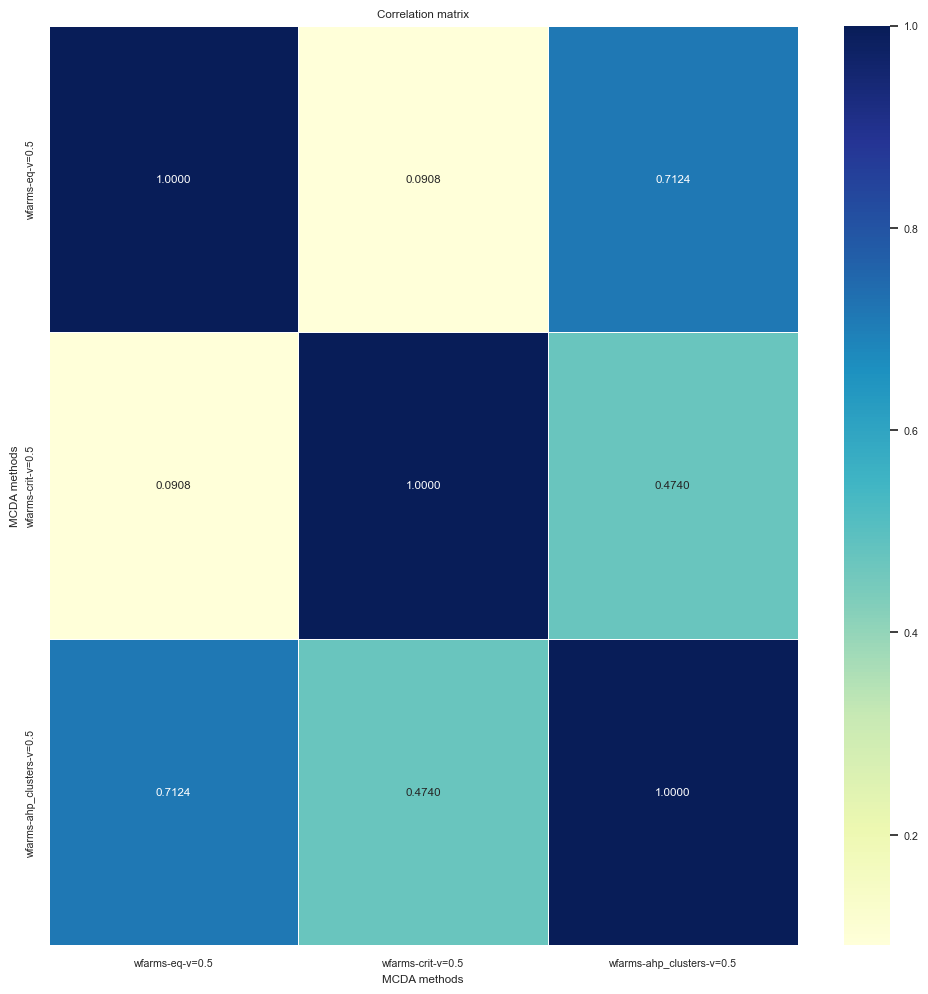

In [25]:
experiment.heatmap_ahp_correlations()

Based on the correlation matrix from **TABLE**, the results of the AHP-clusters scenario studied in this experiment are more similar to the ones obtained with the use of equal weights' scenario than the CRIT weights. This is understandable, as although individual clusters' importance was evaluated using expert judgment, the split of the weights within each cluster remained equal. This is visible on charts **TUTAJ**, where the EQ weights are very similar to AHP weights. Nonetheless, the correlation between AHP and CRIT rankings, 0.4740, is also indicating these rankings are significantly correlated.

If exclusively the winning alternative is considered in all rankings, the AHP scenario favors alternative A2, the same one that the CRIT scenario, whereas EQ scenario favors alternative A3.

### Criteria Elimination Robustness

As it was indicated in **Section ..**, the S16, S17, F28, F29 and F30 criteria were conflicting with the remaining criteria. Therefore, in a subsequent experiment, these criteria were eliminated, and another rankings were computed, for such updated decision matrices. The results are presented in on charts on Fig. **TUTAJ**.

<Figure size 640x480 with 0 Axes>

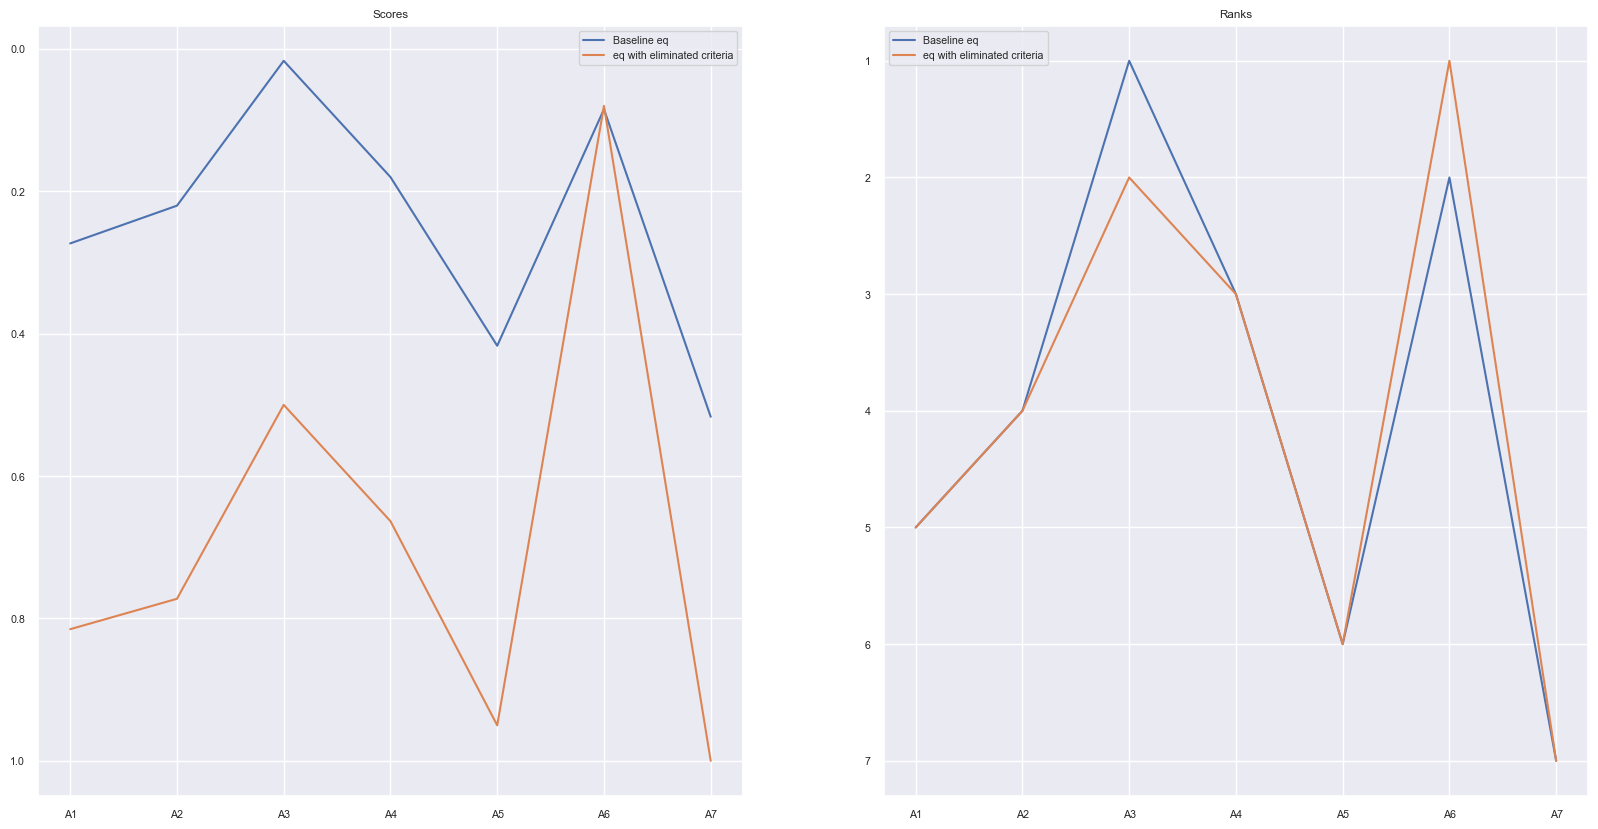

<Figure size 640x480 with 0 Axes>

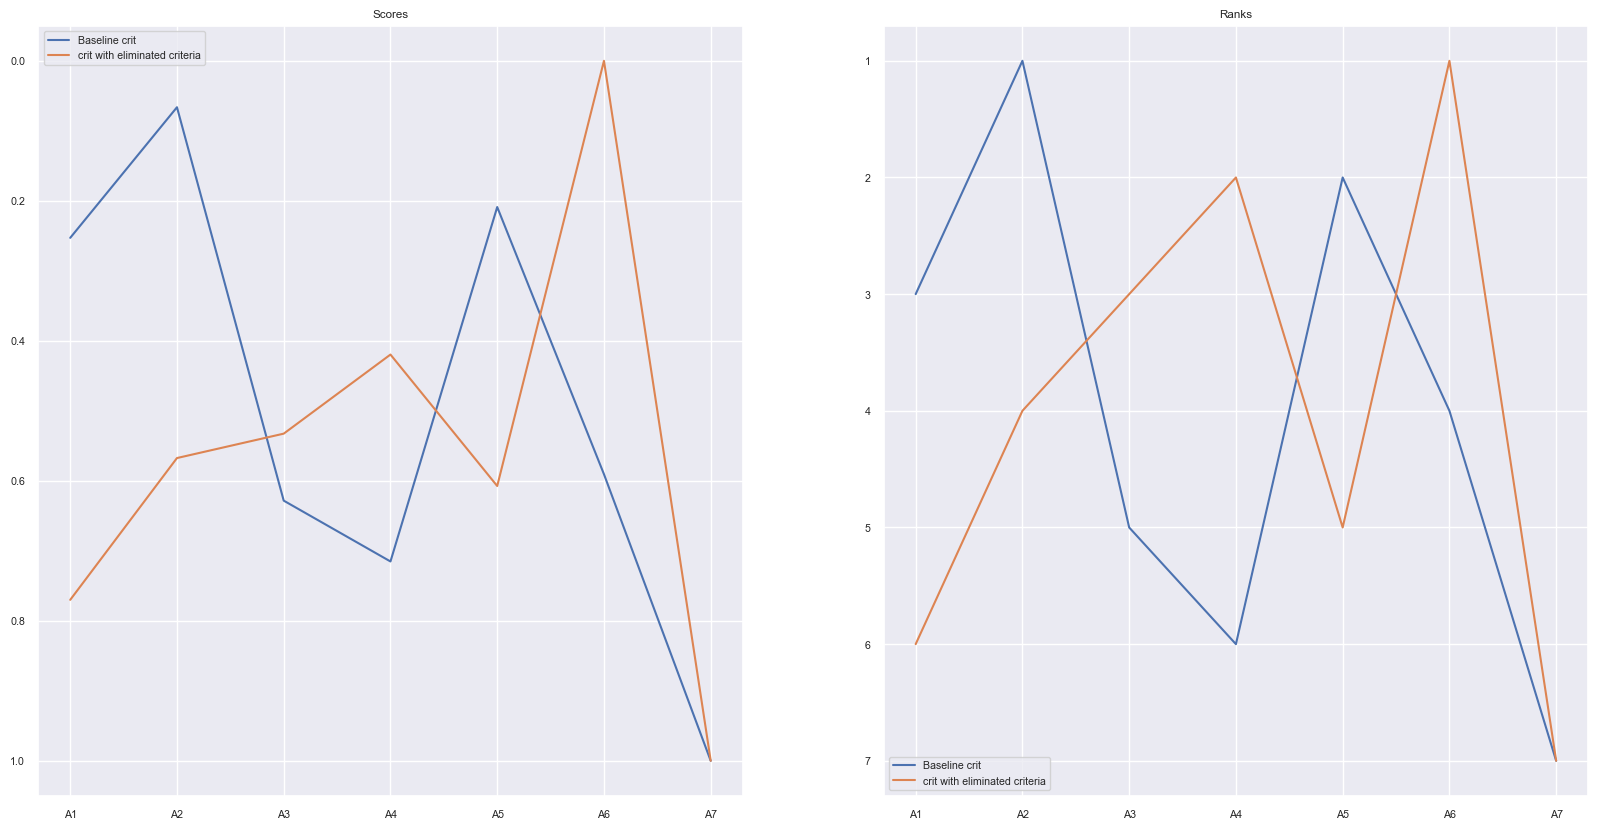

<Figure size 640x480 with 0 Axes>

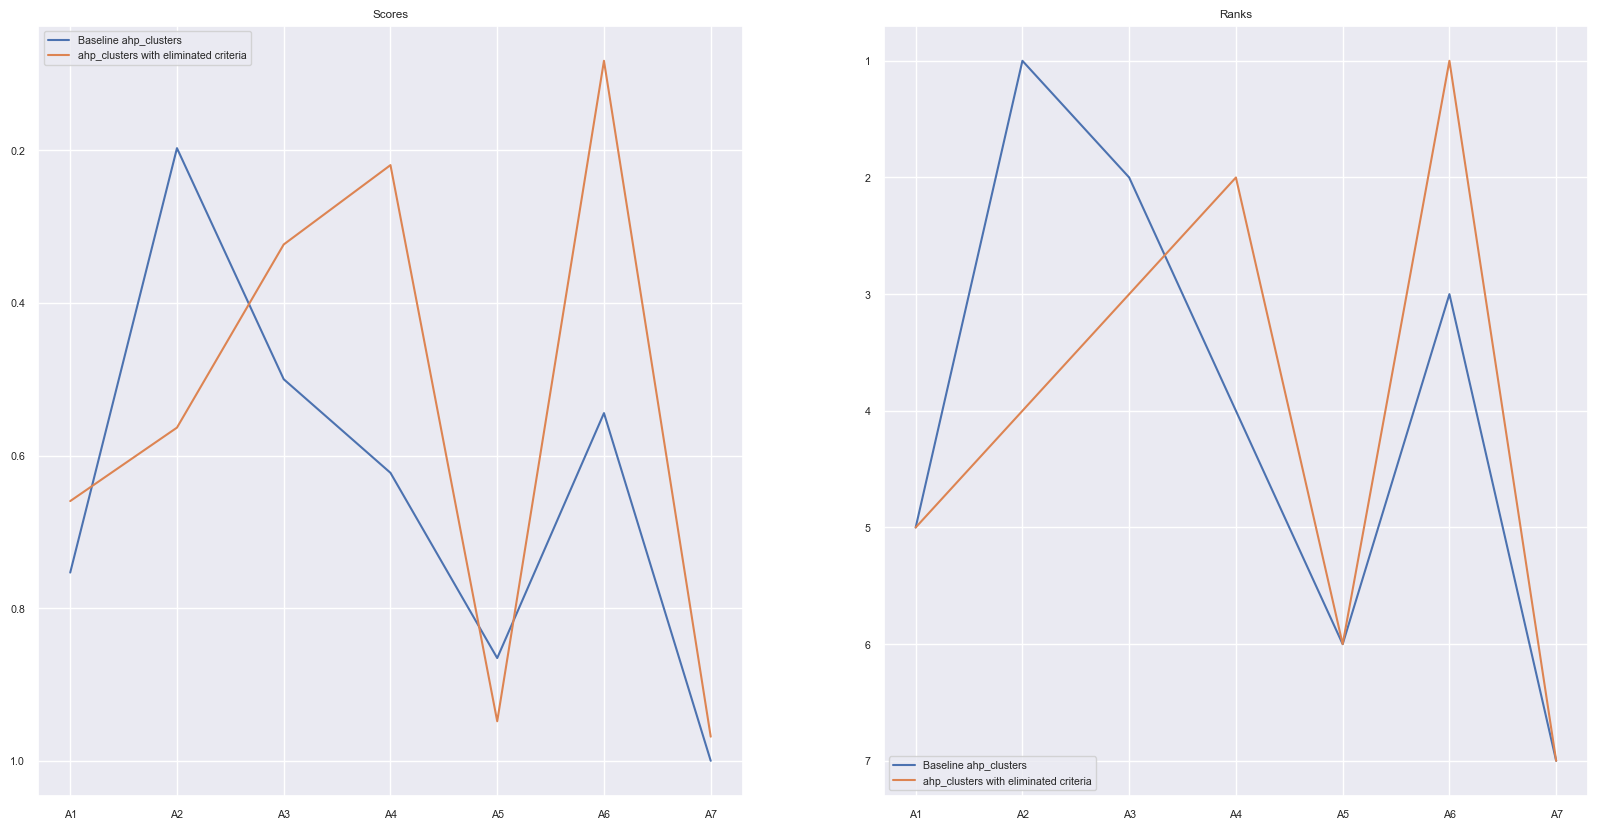

In [26]:
for scenario in ['eq', 'crit', 'ahp_clusters']:
    experiment.draw_elimination_results_comparison(scenario)
    plt.show()


For the EQ weights, the elimination of the 5 criteria affected the ranking only slightly - alternative A6 became ranked first, after previously being ranked second. However, when the scores are studied, it can be observed that A6's score did not change, whilst the scores of the rest of the alternatives became significantly higher (worse).

On the other hand, the elimination of the 5 criteria resulted in massive changes for the CRIT weights. Note, that all weights were recomputed after the elimination of those 5 criteria, and evidently for CRIT method that produced completely different output. The winning alternative is now A6, same as for the EQ weights.

Finally, for the AHP_CLUSTERS weights, most significant changes in scores can be observed for alternatives A2, A4, A6 and result in A6 winning (previously ranked 3rd).

**co to pokazuje, dlaczego jak te 5 kryt sie wywali to teraz A6 najlepsze?**



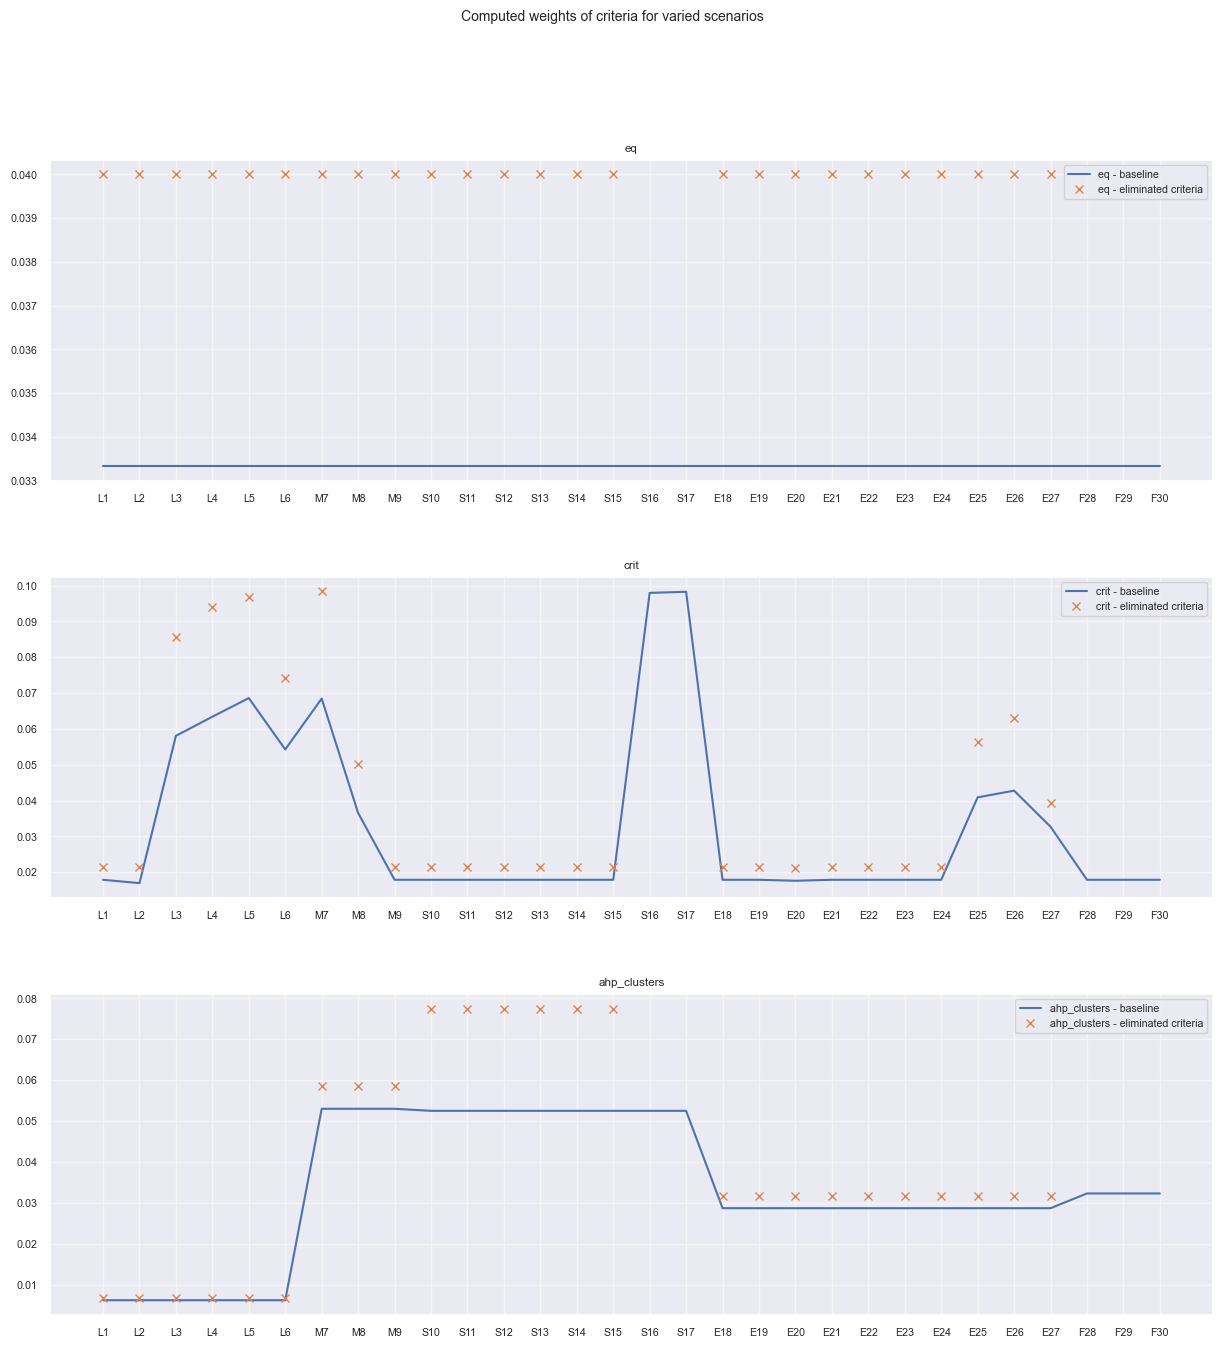

In [27]:
experiment.draw_ahp_and_elim_weights_plots()
plt.show()

The changes in weighs are presented **TUTAJ**.

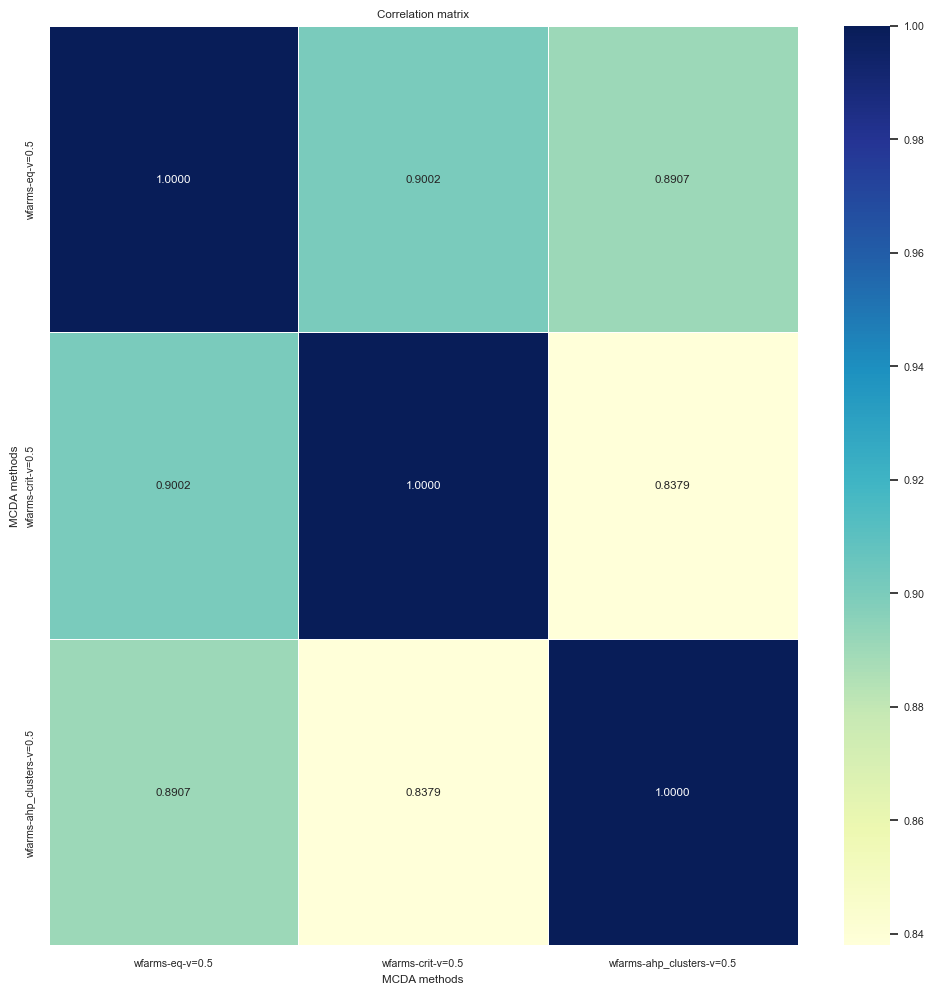

In [28]:
experiment.heatmap_elimination_correlations(path='var/elimination_correlation.png')
plt.show()

The observations presented above are also confirmed in the correlation matrix between all weighting methods for the elimination scenario. It can be observed, that all scores are highly correlated.

### Financial Efficiency

In the final experiment, all but the financial criteria were taken into consideration when evaluating the alternatives. 

In [29]:
experiment.dataframe_financial_efficiency_scores()

,decision_problem,weights_set,evaluator,scenario,A1,A2,A3,A4,A5,A6,A7
0,wfarms,eq,v=0.5,baseline,0.290773,0.246292,0.018519,0.188749,0.438529,0.101910,0.518519
1,wfarms,crit,v=0.5,baseline,0.255878,0.064659,0.549458,0.669906,0.229203,0.542509,1.000000
0,wfarms,eq,v=0.5,financial_efficiency,0.000367,0.000433,0.002769,0.000389,0.000500,0.000661,0.000370
1,wfarms,crit,v=0.5,financial_efficiency,0.000417,0.001650,0.000093,0.000110,0.000958,0.000124,0.000192


<Figure size 640x480 with 0 Axes>

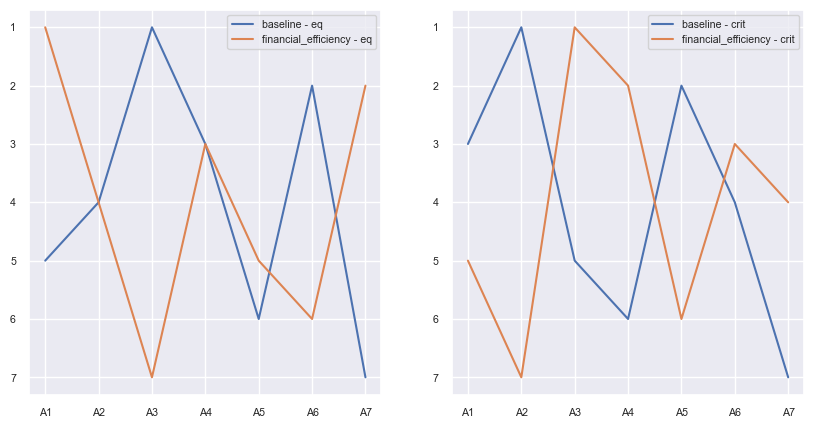

In [30]:
experiment.draw_financial_efficiency_ranks()